# Eigenstates of 1D quantum systems

We need to remember the time-independent Schrödinger equation:

$$\hat{H}\psi = E\psi$$

for a confined quantum particle, it takes the form:

$$-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2} + V(x)\psi = E\psi$$
$$\psi(0) = \psi(L) = 0$$

it's a example of **regular Sturm-Liouville eigenvalue problem**. What's the beautiful about this is that:

* There exist an infinite set of real eigenvalues $E_0\leq E_1\leq E_2\leq\cdots$ with a smallest egeinvalue denoted by $E_0$.
* The corresponding eigenfunctions $\psi^{(0)}, \psi^{(1)}, \psi^{(2)}, \cdots$ are **complete**. That means that any piecewise smooth function $f(x)$ on $[0,L]$ can be constructed as a linear combination of them: $f(x) \sim \displaystyle\sum_{n=0}^\infty c_n\psi^{(n)}(x)$.
* The eigenfunctions are **orthogonal**. That means that $\displaystyle\int_0^L\psi^{(n)}(x)\psi^{(m)}(x)dx = \delta_{nm}$.

## Mathematical formulation

Since we plan to use numerical methods to solve this problem, we need to ensure that we're working with dimensionless quantities. First, we choose $\hbar = 1$ and multiply the Schrödinger equation by $m$:

$$-\frac{1}{2}\frac{d^2}{dx^2}\psi + mV(x)\psi = Em\psi$$

but we still have a dimensionfull quantity $x$ in the derivative. So, we make the substitution $y = x/L$ and we get:

$$
\begin{align*}
-\frac{1}{2}\frac{d^2}{dy^2}\psi + mL^2V(y)\psi = mL^2Em\psi\\
\psi(y=0) = \psi(y=1) = 0
\end{align*}
$$

This is much easier to work with, numerically; it means we're requiered to define $mL^2V$ as opposed to $V$ on its own.

Now, we need to discretize the problem. We can do this by transforming the **differential equation** into **finite difference equation** by using discrete intervals $\Delta y$

$$\left.\frac{d^2f}{dx^2}\right._{x=j\Delta x} = \frac{f_{j+1} - 2f_j + f_{j-1}}{\Delta x^2}$$

where $f_j = f(j\Delta x)$. We can rewrtite our equation as:

$$-\frac{1}{2} \frac{\psi_{j+1} - 2\psi_j + \psi_{j-1}}{\Delta y^2} + mL^2V_j\psi_j = mL^2Em\psi_j$$

and after some algebra, we get:

$$-\frac{1}{2\Delta y^2}\psi_{j+1} + \left(\frac{1}{\Delta y^2} + mL^2V_j\right)\psi_j - \frac{1}{2\Delta y^2}\psi_{j-1} = mL^2Em\psi_j$$

that is a large system of linear equations. 
* $-\frac{1}{2\Delta y^2}\psi_2 + \left(\frac{1}{\Delta y^2} + mL^2V_1\right)\psi_1 - \frac{1}{2\Delta y^2}\psi_0 = mL^2E\psi_1$
* $\cdots$
* $-\frac{1}{2\Delta y^2}\psi_{N} + \left(\frac{1}{\Delta y^2} + mL^2V_{N-2}\right)\psi_{N-1} - \frac{1}{2\Delta y^2}\psi_{N-2} = mL^2E\psi_{N-1}$

where $N= 1/\Delta y$ is the number of points we use in the interval $y \in [0,1]$. We can rewrite this as a matrix equation when we recall the boundary conditions $\psi_0 = \psi_N = 0$:

$$\begin{bmatrix}
\left(\frac{1}{\Delta y^2} + mL^2V_1\right) & -\frac{1}{2\Delta y^2} & 0 & \cdots & 0\\
-\frac{1}{2\Delta y^2} & \left(\frac{1}{\Delta y^2} + mL^2V_2\right) & -\frac{1}{2\Delta y^2} & \cdots & 0\\
0 & -\frac{1}{2\Delta y^2} & \left(\frac{1}{\Delta y^2} + mL^2V_3\right) & \cdots & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
0 & \cdots & 0 & -\frac{1}{2\Delta y^2} & \left(\frac{1}{\Delta y^2} + mL^2V_{N-1}\right)
\end{bmatrix}
\begin{bmatrix}
\psi_1\\
\psi_2\\
\psi_3\\
\vdots\\
\psi_{N-1}
\end{bmatrix}
=
mL^2E\begin{bmatrix}
\psi_1\\
\psi_2\\
\psi_3\\
\vdots\\
\psi_{N-1}
\end{bmatrix}
$$

Hence to solve this problem we just need to find the eigenvectors and eigenvalues of the matrix on the left hand side.

## Programming the solution

### Installing the required packages
* [numpy](http://www.numpy.org/) is a package for scientific computing with Python.
* [scipy](https://www.scipy.org/) is a Python-based ecosystem of open-source software for mathematics, science, and engineering.
* [matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

In [104]:
%pip install numpy scipy matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.


### Importing the required packages

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

We need to define $N$ and $dy$

In [106]:
N = 100
dy = 1 / N
y = np.linspace(0, 1, N + 1)

Now, we define potential $mL^2V(y)$	arbitrary. In this case

$$1000 \sin(20y) y^4$$

In [148]:
def mL2V(y):
    # Harmonic oscillator potential
    return 0.5 * (y-0.5)**2

Now let's define the matrix main diagonal and the off-diagonal elements

In [149]:
d = 1/dy**2 + mL2V(y)[1:-1]
e = -1/(2*dy**2) * np.ones(len(d) - 1)

Finally, we solve the eigenvalue problem using the `scipy.linalg.eigh_tridiagonal` function, that receives `d` and `e` as arguments. The function returns the eigenvalues and eigenvectors of the matrix.

In [150]:
w, v = eigh_tridiagonal(d, e)

We can plot, first, the potential

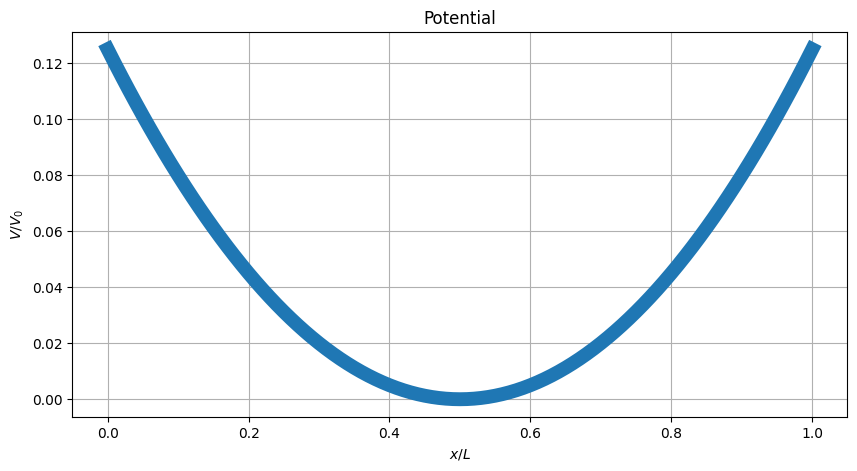

In [151]:
plt.figure(figsize=(10, 5))
plt.plot(y, mL2V(y), '-', lw=10)
plt.title("Potential")
plt.xlabel("$x/L$")
plt.ylabel("$V/V_0$")
plt.grid()
plt.show()

Now, we can plot the eigenstates for the first 4 eigenvalues

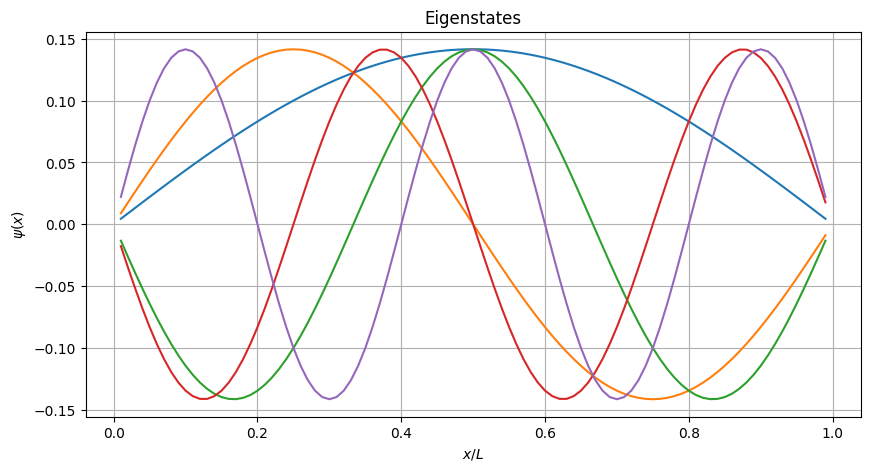

In [152]:
plt.figure(figsize=(10, 5))
plt.plot(y[1:-1], v.T[0], label="Ground state")
plt.plot(y[1:-1], v.T[1], label="First excited state")
plt.plot(y[1:-1], v.T[2], label="Second excited state")
plt.plot(y[1:-1], v.T[3], label="Third excited state")
plt.plot(y[1:-1], v.T[4], label="Fourth excited state")
plt.title("Eigenstates")
plt.xlabel("$x/L$")
plt.ylabel("$\psi(x)$")
plt.grid()
plt.show()

In addition, we can plot the quantized energy levels

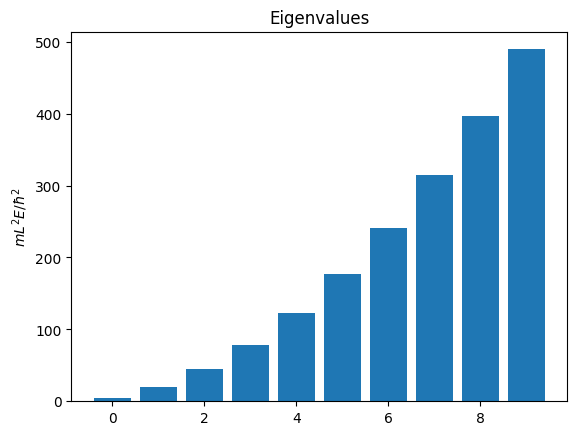

In [153]:
plt.bar(np.arange(0, 10, 1), w[0:10])
plt.title("Eigenvalues")
plt.ylabel("$mL^2 E / \hbar^2$")
plt.show()